In [46]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [47]:
# loading the dataset
fifa19_dataframe = pd.read_csv('https://raw.githubusercontent.com/Abhijeetv007/Fifa_19_Blog/master/Data.csv')
fifa19_dataframe.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [48]:
fifa19_dataframe.shape[0]

18207

In [49]:
# finding the missing values
fifa19_dataframe.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [50]:
# Droping the unused columns
col_drop = ['Unnamed: 0', 'ID', 'Photo', 'Flag','Club Logo', 'Preferred Foot', 
                   'Body Type', 'Real Face', 'Jersey Number', 'Joined', 'Loaned From',
                   'Contract Valid Until', 'Height', 'Weight','LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
                   'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
                   'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause']

fifa19_dataframe.drop(col_drop, axis=1, inplace=True)

In [51]:
fifa19_dataframe.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,International Reputation,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,5.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,5.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,5.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,4.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,4.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [52]:
# Converting values/wages from string to number

def str2number(amount):
    """
    This function convert amount string to float 
    """
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])

In [53]:
# Converting value, wage to number
# Firstly convert values, wages string to actual amount, then dividing them by 1 million and 1 k. 
fifa19_dataframe['Value_M'] = fifa19_dataframe['Value'].apply(lambda x: str2number(x) / 1000000)
fifa19_dataframe['Wage_K'] = fifa19_dataframe['Wage'].apply(lambda x: str2number(x) / 1000)


fifa19_dataframe.drop(['Value', 'Wage'], axis=1, inplace=True)

In [54]:
# Handling the missing values
fifa19_dataframe = fifa19_dataframe[fifa19_dataframe['Agility'].isnull()]

In [55]:
wage = fifa19_dataframe.groupby('Club').sum()

In [56]:
player_count = fifa19_dataframe.groupby('Club').count()

In [57]:
# Printing the Number of clubs and average number of players in every club
print('Number of clubs is {}'.format(player_count.shape[0]))
print('Average number players in each club is {}'.format(round(player_count['Age'].mean(),2)))
print('Total Average wage(K) potential ratio is {}'
      .format(round(wage['Wage_K'].sum() / wage['Potential'].sum(), 2)))

Number of clubs is 43
Average number players in each club is 1.12
Total Average wage(K) potential ratio is 0.03


In [58]:
wage['Wage/Potential'] = wage['Wage_K'] / wage['Potential']
wage['Player Number'] = player_count['Age']
wage['Player Average Age'] =wage['Age'] /wage['Player Number']

In [59]:
wage.sort_values('Wage/Potential', ascending=False, inplace=True)

In [60]:
wage.head()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M,Wage_K,Wage/Potential,Player Number,Player Average Age
Club,,,,,,,,,,,,,,,,,,,,,
Al Nassr,25,62,64,1665,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.30,5.0,0.078125,1,25.0
Everton,19,62,78,1328,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.60,5.0,0.064103,1,19.0
Notts County,35,62,62,1573,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.14,3.0,0.048387,1,35.0
Oldham Athletic,28,62,62,1740,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.30,3.0,0.048387,1,28.0
SV Mattersburg,28,62,62,1630,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.24,3.0,0.048387,1,28.0


### Top 10 clubs in fifa whose spending wages on players capacity

Text(0.5, 1.0, 'Top 10 clubs spending wage(K) on their players capacity')

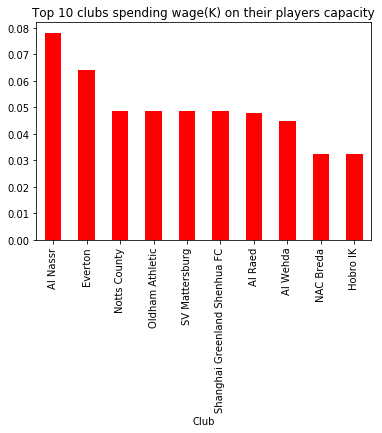

In [67]:

wage['Wage/Potential'].head(10).plot(kind='bar', color='red')
plt.title('Top 10 clubs spending wage(K) on their players capacity')

### Top 10 economocical clubs in fifa

Text(0.5, 1.0, 'Top 10 economical clubs in fifa ')

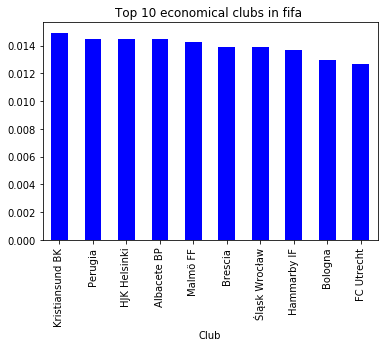

In [68]:
wage['Wage/Potential'].tail(10).plot(kind='bar', color='blue')
plt.title('Top 10 economical clubs in fifa ')

### 2->What is the age distribution like? How is it relates to the player's overall rating?

In [63]:
# Calculating the age count
age = fifa19_dataframe['Age'].value_counts()
age.sort_index(ascending=True, inplace=True)

In [64]:
# Calculating the average overall rating
mean_age = fifa19_dataframe.groupby('Age').mean()

In [65]:
# Ploting the age distribution and overall rating together
age_count = age.values.tolist()
age_overall_rating= mean_age['Overall'].values.tolist()

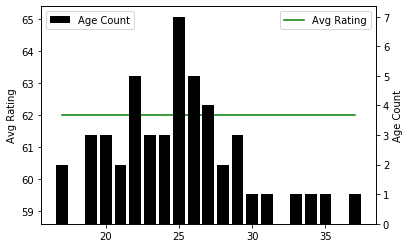

In [69]:
ages_values = age.index.values.tolist()
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(ages_values,age_overall_rating, color = 'green', label='Avg Rating')
ax1.legend(loc=1)
ax1.set_ylabel('Avg Rating')

ax2 = ax1.twinx()
plt.bar(ages_values, age_count, label='Age Count',color='black')
ax2.legend(loc=2)
ax2.set_ylabel('Age Count')
plt.show()